# Black Friday Dataset
The dataset here is a sample of the transactions made in a retail store. The store wants to know better the customer purchase behaviour against different products. Specifically, here the problem is a regression problem where we are trying to predict the dependent variable (the amount of purchase) with the help of the information contained in the other variables.

## 1. Data Cleaning

In [1]:
# importing libraries
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('BlackFriday.csv')
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [3]:
df.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            166986
Product_Category_3            373299
Purchase                           0
dtype: int64

##### Product_Category_2 and Product_Category_2 have many NA values, maybe because the customers didnt buy this product.

In [4]:
print(df['Product_Category_2'].unique())
print(df['Product_Category_3'].unique())

[nan  6. 14.  2.  8. 15. 16. 11.  5.  3.  4. 12.  9. 10. 17. 13.  7. 18.]
[nan 14. 17.  5.  4. 16. 15.  8.  9. 13.  6. 12.  3. 18. 11. 10.]


##### We can see that all are numeric values. We will replace the nan values with 0 assuming person didnt buy a product of that category.

In [5]:
df.fillna(0,inplace=True)

In [6]:
print(df.shape)
df.dtypes

(537577, 12)


User_ID                         int64
Product_ID                     object
Gender                         object
Age                            object
Occupation                      int64
City_Category                  object
Stay_In_Current_City_Years     object
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
Purchase                        int64
dtype: object

##### Checking the unique values of categorical columns

##### 1. Gender

In [7]:
df['Gender'].value_counts()

M    405380
F    132197
Name: Gender, dtype: int64

##### 2. Age

In [8]:
df['Age'].value_counts()

26-35    214690
36-45    107499
18-25     97634
46-50     44526
51-55     37618
55+       20903
0-17      14707
Name: Age, dtype: int64

##### 3. City_Category

In [9]:
df['City_Category'].value_counts()

B    226493
C    166446
A    144638
Name: City_Category, dtype: int64

##### 4. Stay_In_Current_City_Years

In [10]:
df['Stay_In_Current_City_Years'].value_counts()

1     189192
2      99459
3      93312
4+     82889
0      72725
Name: Stay_In_Current_City_Years, dtype: int64

###### Replacing 4+ with 4 in Stay_In_Current_City_Years

In [11]:
df['Stay_In_Current_City_Years']
df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].replace({'4+':4})
df['Stay_In_Current_City_Years'].value_counts()

1    189192
2     99459
3     93312
4     82889
0     72725
Name: Stay_In_Current_City_Years, dtype: int64

In [12]:
df['Marital_Status'].value_counts()

0    317817
1    219760
Name: Marital_Status, dtype: int64

##### dropping columns User_ID and Product_ID

In [13]:
df.drop(['User_ID','Product_ID'],axis=1,inplace=True)
df.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,F,0-17,10,A,2,0,3,0.0,0.0,8370
1,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,F,0-17,10,A,2,0,12,0.0,0.0,1422
3,F,0-17,10,A,2,0,12,14.0,0.0,1057
4,M,55+,16,C,4,0,8,0.0,0.0,7969


##### Changing datatype of Product_Category_2 and Product_Category_3 from float to int

In [14]:
df["Product_Category_2"] = df["Product_Category_2"].astype(int)
df["Product_Category_3"] = df["Product_Category_3"].astype(int)
df.dtypes

Gender                        object
Age                           object
Occupation                     int64
City_Category                 object
Stay_In_Current_City_Years    object
Marital_Status                 int64
Product_Category_1             int64
Product_Category_2             int32
Product_Category_3             int32
Purchase                       int64
dtype: object

## 2. Exploratory Data Analysis

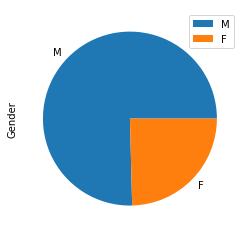

In [15]:
df["Gender"].value_counts().plot.pie(legend=True)

##### We can see the proportion of males is larger than females

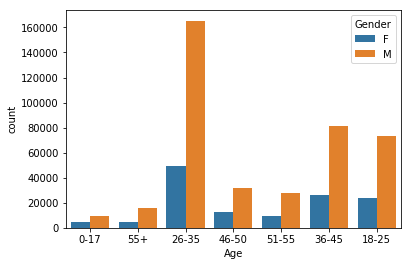

In [16]:
sns.countplot(df['Age'],hue=df['Gender'],data=df)

#### We can see that people of age group 26-35 mostly attended this sale followed by people of age group 18-25 and 36-45. The plot shows that the proportion of males is more. This may also be the case since if people are married, males do the payments.

In [17]:
df['Marital_Status']= df.Marital_Status.replace({0:'Not Married',1:'Married'})
df.groupby(['Age','Marital_Status','Gender'])[['Marital_Status']].count()

Marital_Status
Age   Marital_Status Gender                
0-17  Not Married    F                 4953
                     M                 9754
18-25 Married        F                 6117
                     M                14524
      Not Married    F                17940
                     M                59053
26-35 Married        F                19959
                     M                64207
      Not Married    F                29389
                     M               101135
36-45 Married        F                10115
                     M                32392
      Not Married    F                16305
                     M                48687
46-50 Married        F                 9797
                     M                22397
      Not Married    F                 3059
                     M                 9273
51-55 Married        F                 6150
                     M                20829
      Not Married    F                 3484
                     M                 7155
55+   Married        F                 3085
                     M                10188
      Not Married    F                 1844
                     M                 5786

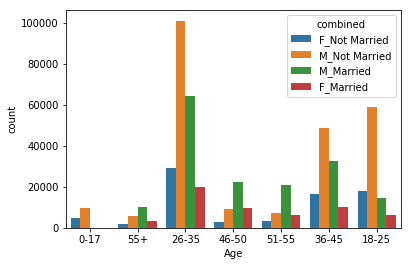

In [18]:
df['combined'] = df.apply(lambda x:'%s_%s' % (x['Gender'],x['Marital_Status']),axis=1)
sns.countplot(df['Age'],hue=df['combined'])

#### We can see of the age group 26-35, 64207 males are married while 101135 are not married. So this shows that men are more interested in the sale. There are high number of people in the age group 18-25 and 26-35 out of which we can see that the count of unmarried men is more indicating their interest. 

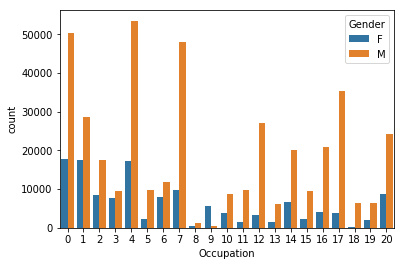

In [19]:
sns.countplot(df['Occupation'],hue=df['Gender'])

#### We can see that most of the people belong to occupation codes 0,4,7 and 17. So people belonging to such occupations can be targetted for the sale.

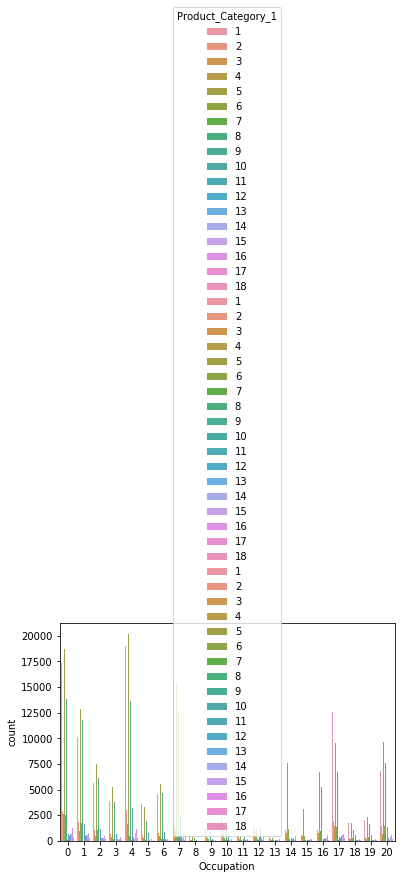

In [20]:
sns.countplot(df['Occupation'],hue=df['Product_Category_1'])
sns.countplot(df['Occupation'],hue=df['Product_Category_1'])
sns.countplot(df['Occupation'],hue=df['Product_Category_1'])

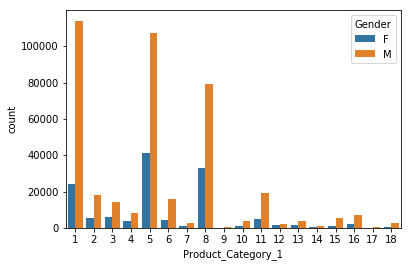

In [21]:
sns.countplot(df['Product_Category_1'],hue=df['Gender'])

#### We can see that people purchased product ids 1,5 and 8 mostly from Product_Category_1.

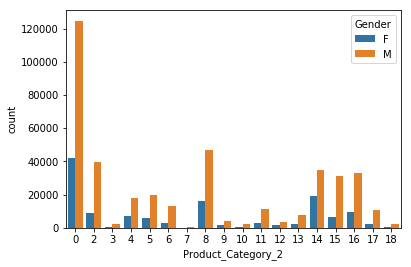

In [22]:
sns.countplot(df['Product_Category_2'],hue=df['Gender'])

#### We can see that not many people buy products from Product_Category_2 since most of them are 0. Only very few buy products with id 8,14,15,16 from this category

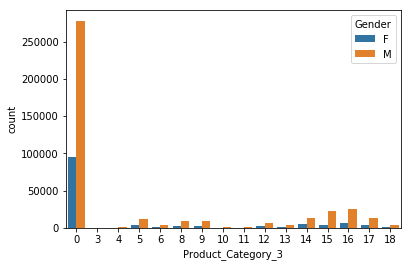

In [23]:
sns.countplot(df['Product_Category_3'],hue=df['Gender'])

#### We can see that very few people buy products from this category. So to increase sales we can focus more on product category 1 and maybe 2

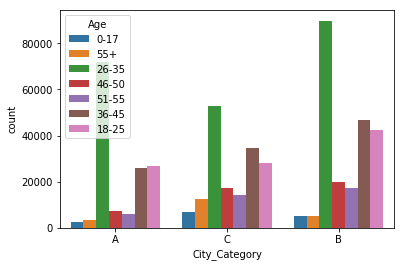

In [24]:
sns.countplot(df['City_Category'],hue=df['Age'])

#### We can see that mostly people interested in this sale belong to B and A cities.

In [25]:
df.columns

Index(['Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase', 'combined'],
      dtype='object')

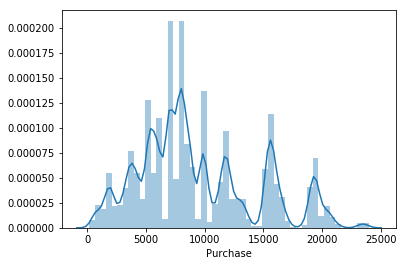

In [44]:
sns.distplot(df['Purchase'])

In [47]:
#sns.barplot(df['Stay_In_Current_City_Years'],df['Purchase'])

In [46]:
#sns.swarmplot(x='City_Category',y='Purchase',data=df)

## 3. Model Building

### Linear Regression

In [27]:
#dropping category_3 as it has many missing values
df1 = df.copy()
df.drop(['combined','Product_Category_3'],axis=1,inplace=True)

In [28]:
df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].astype(int)
df['Occupation'] = pd.Categorical(df['Occupation'])
df['Marital_Status'] = pd.Categorical(df['Marital_Status'])
df.dtypes

Gender                          object
Age                             object
Occupation                    category
City_Category                   object
Stay_In_Current_City_Years       int32
Marital_Status                category
Product_Category_1               int64
Product_Category_2               int32
Purchase                         int64
dtype: object

##### Note: 
Product_Category doesnt represent number of items, it represents a particular product subcategory in the given product  category 1,2,3. It is important to think of these as categorical values instead of continous 

In [29]:
### ONE HOT ENCODING for categorical Variables
df_dummy = pd.get_dummies(df,drop_first=True,prefix_sep='_',columns=['Gender','Age','Occupation','City_Category','Marital_Status','Product_Category_1','Product_Category_2'])
df_dummy.columns

Index(['Stay_In_Current_City_Years', 'Purchase', 'Gender_M', 'Age_18-25',
       'Age_26-35', 'Age_36-45', 'Age_46-50', 'Age_51-55', 'Age_55+',
       'Occupation_1', 'Occupation_2', 'Occupation_3', 'Occupation_4',
       'Occupation_5', 'Occupation_6', 'Occupation_7', 'Occupation_8',
       'Occupation_9', 'Occupation_10', 'Occupation_11', 'Occupation_12',
       'Occupation_13', 'Occupation_14', 'Occupation_15', 'Occupation_16',
       'Occupation_17', 'Occupation_18', 'Occupation_19', 'Occupation_20',
       'City_Category_B', 'City_Category_C', 'Marital_Status_Not Married',
       'Product_Category_1_2', 'Product_Category_1_3', 'Product_Category_1_4',
       'Product_Category_1_5', 'Product_Category_1_6', 'Product_Category_1_7',
       'Product_Category_1_8', 'Product_Category_1_9', 'Product_Category_1_10',
       'Product_Category_1_11', 'Product_Category_1_12',
       'Product_Category_1_13', 'Product_Category_1_14',
       'Product_Category_1_15', 'Product_Category_1_16',
      

In [30]:
df_dummy.shape

(537577, 66)

Not checking correlation or scaling values as most of the columns are categorical in nature

In [31]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

X_dummy = df_dummy.loc[:,~df_dummy.columns.isin(['Purchase'])]
y = df_dummy.loc[:,'Purchase']
X_train, X_test, y_train, y_test = train_test_split(X_dummy, y, test_size=0.3, random_state=0)

In [32]:
linear_model = LinearRegression()
linear_model.fit(X_train,y_train)
y_pred_linear = linear_model.predict(X_test)
y_train_predict = linear_model.predict(X_train)

rmse_train = np.sqrt(mean_squared_error(y_train,y_train_predict))
r2_train = r2_score(y_train,y_train_predict)

rmse = np.sqrt(mean_squared_error(y_test,y_pred_linear))
r2 = r2_score(y_test,y_pred_linear)

print('Root mean squared error on Training Set', rmse_train)
print('R2 score on Training Set: ', r2_train)

print('Root mean squared error on Testing Set', rmse)
print('R2 score on Testing Set: ', r2)

Root mean squared error on Training Set 3020.4265656020066
R2 score on Training Set:  0.6323418392245711
Root mean squared error on Testing Set 2996.874892176096
R2 score on Testing Set:  0.6378968509225831


In [33]:
print('Slope:' ,linear_model.coef_)
print('Intercept:', linear_model.intercept_)

Slope: [ 8.89735072e+00 -5.82264913e+01 -1.82043966e+02 -8.55505509e+01
  3.79679473e+01  5.32669149e+01  2.96283426e+02  1.87639595e+02
 -4.67265322e+01  3.98075584e+01  2.05581000e+02  1.56111134e+02
  3.27425694e+01  1.81224647e+02  1.03475245e+02 -3.13951076e+02
  1.13075079e+02 -6.13838873e+01  8.96451226e+01  2.45106789e+02
  6.61921262e+01  1.93799779e+02  3.49204999e+02  1.05853820e+02
  1.91724600e+02 -8.13200451e+00 -3.55821997e+02 -9.99330869e+01
  1.36240926e+02  5.52525132e+02  5.48262618e+01 -1.80969145e+03
 -2.40400658e+03 -1.09422167e+04 -7.38076315e+03  1.83674372e+03
  2.87793817e+03 -6.06891760e+03  1.79707002e+03  6.15312642e+03
 -8.80285496e+03 -1.22517365e+04 -1.28488674e+04 -4.59952671e+02
  1.14591446e+03  1.18989254e+03 -3.33906299e+03 -1.05928706e+04
  7.59317301e+01 -5.73529987e+02 -1.17291989e+03 -4.26047931e+02
  5.14195230e+02  6.76888823e+02  4.86287464e+02 -1.52997339e+02
  1.24272723e+03 -3.63209699e+02 -2.86700602e+02 -1.56161631e+02
 -1.74705665e+01 -

## LASSO 

In [38]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(normalize=True,alpha=1.0,random_state=0)
lasso_reg.fit(X_train,y_train)
y_pred_lasso = linear_model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test,y_pred_lasso))
r2 = r2_score(y_test,y_pred_lasso)

print('Root mean squared error on Testing Set', rmse)
print('R2 score on Testing Set: ', r2)

Root mean squared error on Testing Set 2996.874892176096
R2 score on Testing Set:  0.6378968509225831


## RIDGE

In [39]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(normalize=True,random_state=0)
ridge_reg.fit(X_train,y_train)
y_pred_ridge = linear_model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test,y_pred_ridge))
r2 = r2_score(y_test,y_pred_ridge)

print('Root mean squared error on Testing Set', rmse)
print('R2 score on Testing Set: ', r2)

Root mean squared error on Testing Set 2996.874892176096
R2 score on Testing Set:  0.6378968509225831


## Ordinary Least Squares (OLS)

In [36]:
import statsmodels.api as sm
import statsmodels.formula.api as sm 
from statsmodels.formula.api import ols
from IPython.display import HTML, display

X= X_dummy.copy()
X['intercept'] = np.ones((X.shape[0],),dtype=int) #Adding an intercept column of value 1 - constant (Beta -0)

X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.3, random_state=0)

ols_model = sm.OLS(y_train1,X_train1).fit()
ols_model_summary = ols_model.summary()
HTML(ols_model_summary.as_html())

#### We can see that almost all the variables have a low p-value indicating all are significantly important and the adjusted R-squared is also the same as R-squared so we dont have redundant features 

In [37]:
pred_ols = ols_model.predict(X_test1)
rmse = np.sqrt(mean_squared_error(y_test1,pred_ols))
r2 = r2_score(y_test1,pred_ols)

print('Root mean squared error on Testing Set', rmse)
print('R2 score on Testing Set: ', r2)

Root mean squared error on Testing Set 2996.874892176096
R2 score on Testing Set:  0.6378968509225831


## Gradient Boosting Regressor

1. Without Tuning

In [40]:
from sklearn.ensemble import GradientBoostingRegressor

# Create the model
gradient_boosted = GradientBoostingRegressor()
gradient_boosted.fit(X_train,y_train)

# Make predictions on the test data
y_pred_gbr = gradient_boosted.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test,y_pred_gbr))
r2 = r2_score(y_test,y_pred_gbr)

print('Root mean squared error on Testing Set', rmse)
print('R2 score on Testing Set: ', r2)

Root mean squared error on Testing Set 3035.6119513750787
R2 score on Testing Set:  0.6284753931486078


2. With Tuning

In [43]:
from sklearn.ensemble import GradientBoostingRegressor
import datetime
print("Start of GBR ",datetime.datetime.now())
gbr_reg = GradientBoostingRegressor(learning_rate=0.2,max_features=8,random_state=7,max_depth=9,min_samples_split=2000,n_estimators=800,alpha=0.8)
gbr_reg.fit(X_train,y_train)

# Make predictions on the test data
y_pred_gbr = gbr_reg.predict(X_test)
print("End of GBR ",datetime.datetime.now())
rmse = np.sqrt(mean_squared_error(y_test,y_pred_gbr))
r2 = r2_score(y_test,y_pred_gbr)

print('Root mean squared error on Testing Set', rmse)
print('R2 score on Testing Set: ', r2)

Start of GBR  2019-03-08 14:07:32.679673
End of GBR  2019-03-08 14:20:05.815335
Root mean squared error on Testing Set 2913.6329640428835
R2 score on Testing Set:  0.6577332120167


## XGBoost

In [48]:
from xgboost import XGBRegressor
print("Start of XGBR ",datetime.datetime.now())
xgbr = XGBRegressor(eta=0.2,max_depth=9,random_state=7,n_estimators=200,subsample=0.8,learning_rate=0.1,gamma=0)
xgbr.fit(X_train,y_train)
y_pred_xgbr = xgbr.predict(X_test)
print("End of XGBR ",datetime.datetime.now())
rmse = np.sqrt(mean_squared_error(y_test,y_pred_xgbr))
r2 = r2_score(y_test,y_pred_xgbr)

print('Root mean squared error on Testing Set', rmse)
print('R2 score on Testing Set: ', r2)

Start of XGBR  2019-03-08 16:58:22.856840
End of XGBR  2019-03-08 17:08:31.085998
Root mean squared error on Testing Set 2906.3289528318746
R2 score on Testing Set:  0.6594470771721898


In [47]:
from xgboost import XGBRegressor
print("Start of XGBR ",datetime.datetime.now())
xgbr = XGBRegressor(eta=0.2,max_depth=9,random_state=7,n_estimators=300,subsample=0.8,learning_rate=0.1,gamma=0)
xgbr.fit(X_train,y_train)
y_pred_xgbr = xgbr.predict(X_test)
print("End of XGBR ",datetime.datetime.now())
rmse = np.sqrt(mean_squared_error(y_test,y_pred_xgbr))
r2 = r2_score(y_test,y_pred_xgbr)

print('Root mean squared error on Testing Set', rmse)
print('R2 score on Testing Set: ', r2)

Start of XGBR  2019-03-08 15:41:24.090454
End of XGBR  2019-03-08 15:54:24.675079
Root mean squared error on Testing Set 2903.4582076980137
R2 score on Testing Set:  0.6601195115913265


In [45]:
from xgboost import XGBRegressor
print("Start of XGBR ",datetime.datetime.now())
xgbr = XGBRegressor(eta=0.2,max_depth=9,random_state=7,n_estimators=500,subsample=0.8,learning_rate=0.1,gamma=0)
xgbr.fit(X_train,y_train)
y_pred_xgbr = xgbr.predict(X_test)
print("End of XGBR ",datetime.datetime.now())
rmse = np.sqrt(mean_squared_error(y_test,y_pred_xgbr))
r2 = r2_score(y_test,y_pred_xgbr)

print('Root mean squared error on Testing Set', rmse)
print('R2 score on Testing Set: ', r2)

Start of XGBR  2019-03-08 15:12:49.136776
End of XGBR  2019-03-08 15:39:32.702748
Root mean squared error on Testing Set 2911.256582903868
R2 score on Testing Set:  0.6582912951106994


In [44]:
from xgboost import XGBRegressor
print("Start of XGBR ",datetime.datetime.now())
xgbr = XGBRegressor(eta=0.2,max_depth=9,random_state=7,n_estimators=800,subsample=0.8,learning_rate=0.1,gamma=0)
xgbr.fit(X_train,y_train)
y_pred_xgbr = xgbr.predict(X_test)
print("End of XGBR ",datetime.datetime.now())
rmse = np.sqrt(mean_squared_error(y_test,y_pred_xgbr))
r2 = r2_score(y_test,y_pred_xgbr)

print('Root mean squared error on Testing Set', rmse)
print('R2 score on Testing Set: ', r2)

Start of XGBR  2019-03-08 14:20:10.106852
End of XGBR  2019-03-08 15:04:44.704914
Root mean squared error on Testing Set 2926.512622728487
R2 score on Testing Set:  0.6547005563455898


### TEST DATA OF ANALYTICS VIDYA

In [197]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

train['Stay_In_Current_City_Years'] = train['Stay_In_Current_City_Years'].replace({'4+':4})
train['Stay_In_Current_City_Years'].value_counts()

test['Stay_In_Current_City_Years'] = test['Stay_In_Current_City_Years'].replace({'4+':4})
test['Stay_In_Current_City_Years'].value_counts()

train['Stay_In_Current_City_Years'] = train['Stay_In_Current_City_Years'].astype(int)
test['Stay_In_Current_City_Years'] = test['Stay_In_Current_City_Years'].astype(int)

#Since product 19,20 of product_cat_1 is not present in test,we delete it.
train = train[(train.Product_Category_1 != 19) & (train.Product_Category_1 != 20)]

train_dm = pd.get_dummies(train,drop_first=True,prefix_sep='_',columns=['Gender','Age','Occupation','City_Category','Marital_Status','Product_Category_2','Product_Category_1'])
test_dm = pd.get_dummies(test,drop_first=True,prefix_sep='_',columns=['Gender','Age','Occupation','City_Category','Marital_Status','Product_Category_2','Product_Category_1'])

train_dummy = train_dm.loc[:,~train_dm.columns.isin(['Purchase'])]
target = train_dm.loc[:,'Purchase']

train_dummy.drop(['User_ID','Product_ID','Product_Category_3'],axis=1,inplace=True)
test_dm.drop(['User_ID','Product_ID','Product_Category_3'],axis=1,inplace=True)

C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [196]:
train = train[(train.Product_Category_1 != 19) & (train.Product_Category_1 != 20)]
train['Product_Category_1'].value_counts()

5     150933
1     140378
8     113925
11     24287
2      23864
6      20466
3      20213
4      11753
16      9828
15      6290
13      5549
10      5125
12      3947
7       3721
18      3125
14      1523
17       578
9        410
Name: Product_Category_1, dtype: int64

In [199]:
train_dummy.fillna(0,inplace=True)
test_dm.fillna(0,inplace=True)
print(train_dummy.shape)
print(test_dm.shape)

C:\Program Files\Anaconda3\lib\site-packages\pandas\core\frame.py:2762: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


(545915, 64)
(233599, 64)


(545915,)

In [201]:
#print(train_dummy.drop(['Product_Category_1_19','Product_Category_1_20'],inplace=True,axis=1))
print(train_dummy.shape)
print(test_dm.shape)
print(test['Product_Category_1'].value_counts())
print(test['Product_Category_2'].value_counts())

(545915, 64)
(233599, 64)


In [292]:
from sklearn.ensemble import GradientBoostingRegressor
import datetime
print("Start of GBR ",datetime.datetime.now())
gbr_reg = GradientBoostingRegressor(learning_rate=0.2,max_features=8,random_state=7,max_depth=9,min_samples_split=2000,n_estimators=800,alpha=0.8)
gbr_reg.fit(train_dummy,target)
y_pred_train = gbr_reg.predict(train_dummy)
y_pred_gbr = gbr_reg.predict(test_dm)
print("End of GBR ",datetime.datetime.now())
rmse = np.sqrt(mean_squared_error(target,y_pred_train))
r2 = r2_score(target,y_pred_train)

print('Root mean squared error on Training Set', rmse)
print('R2 score on Training Set: ', r2)

Start of GBR  2019-03-05 19:31:11.319787
End of GBR  2019-03-05 19:51:56.617887
Root mean squared error on Training Set 2872.373102539415
R2 score on Training Set:  0.6673013319209394


In [293]:
test.drop('Purchase',inplace=True,axis=1)

y_pred_gbr_pur = pd.DataFrame(data=y_pred_gbr,columns=['Purchase'])
test = pd.concat((test,y_pred_gbr_pur),axis=1)
test.columns

test.to_csv('test_submission4.csv',index=False)

### USING XGBOOST

In [308]:
## Treating Age categorical, products categorical and including all the 3 categories
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

train['Stay_In_Current_City_Years'] = train['Stay_In_Current_City_Years'].replace({'4+':4})
train['Stay_In_Current_City_Years'].value_counts()

test['Stay_In_Current_City_Years'] = test['Stay_In_Current_City_Years'].replace({'4+':4})
test['Stay_In_Current_City_Years'].value_counts()

train['Stay_In_Current_City_Years'] = train['Stay_In_Current_City_Years'].astype(int)
test['Stay_In_Current_City_Years'] = test['Stay_In_Current_City_Years'].astype(int)

#Since product 19,20 of product_cat_1 is not present in test,we delete it.
train = train[(train.Product_Category_1 != 19) & (train.Product_Category_1 != 20)]

train_dm = pd.get_dummies(train,drop_first=True,prefix_sep='_',columns=['Age','Gender','Occupation','City_Category','Marital_Status','Product_Category_2','Product_Category_1','Product_Category_3'])
test_dm = pd.get_dummies(test,drop_first=True,prefix_sep='_',columns=['Age','Gender','Occupation','City_Category','Marital_Status','Product_Category_2','Product_Category_1','Product_Category_3'])

train_dummy = train_dm.loc[:,~train_dm.columns.isin(['Purchase'])]
target = train_dm.loc[:,'Purchase']

train_dummy.drop(['User_ID','Product_ID'],axis=1,inplace=True)
test_dm.drop(['User_ID','Product_ID'],axis=1,inplace=True)

# Not imputing NAs as trees can deal with that 

C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [323]:
from xgboost import XGBRegressor
print("Start of GBR ",datetime.datetime.now())
xgbr = XGBRegressor(eta=0.2,max_depth=9,random_state=7,n_estimators=800,subsample=0.8,learning_rate=0.1,gamma=0)
xgbr.fit(train_dummy,target)
y_pred_train = xgbr.predict(train_dummy)
y_pred_xgbr = xgbr.predict(test_dm)
print("End of GBR ",datetime.datetime.now())
rmse = np.sqrt(mean_squared_error(target,y_pred_train))
r2 = r2_score(target,y_pred_train)

print('Root mean squared error on Training Set', rmse)
print('R2 score on Training Set: ', r2)

Start of GBR  2019-03-07 10:08:10.601591
End of GBR  2019-03-07 11:12:33.781978
Root mean squared error on Training Set 2651.5080994671275
R2 score on Training Set:  0.7164985556202944


In [319]:
from xgboost import XGBRegressor
#colsample_bytree=0.3-0.8 gamma=0,1,5   subsample=0.8-1
print("Start of GBR ",datetime.datetime.now())
xgbr = XGBRegressor(eta=0.2,max_depth=9,random_state=7,n_estimators=1000,subsample=0.8,learning_rate=0.1,gamma=0)
xgbr.fit(train_dummy,target)
y_pred_train = xgbr.predict(train_dummy)
y_pred_xgbr = xgbr.predict(test_dm)
print("End of GBR ",datetime.datetime.now())
rmse = np.sqrt(mean_squared_error(target,y_pred_train))
r2 = r2_score(target,y_pred_train)

print('Root mean squared error on Training Set', rmse)
print('R2 score on Training Set: ', r2)

Start of GBR  2019-03-06 22:32:33.431303
End of GBR  2019-03-07 00:14:01.923554
Root mean squared error on Training Set 2625.744754047372
R2 score on Training Set:  0.7219810667177391


In [301]:
xgbr.get_xgb_params

<bound method XGBModel.get_xgb_params of XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, eta=0.2, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=9, min_child_weight=1, missing=None,
       n_estimators=500, n_jobs=1, nthread=None, objective='reg:linear',
       random_state=7, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=0.8)>

In [321]:
test.drop('Purchase',inplace=True,axis=1)

y_pred_xgbr_pur = pd.DataFrame(data=y_pred_xgbr,columns=['Purchase'])
test = pd.concat((test,y_pred_xgbr_pur),axis=1)
test.columns

test.to_csv('test_submission7.csv',index=False)

## CONCLUSION

#### 1.  When tested on the unknown test set of Analytics Vidya using XGBOOST the RMSE was 2866.3534989364 which ranked 726 in the leaders board.

#### 2. The lowest RMSE was 2405. We can see that we have done quite a decent job in solving this regression problem. 

#### 3.For our test data (taken from Kaggle) we got an RMSE of 2903 and Rsquared of 0.66 using Gradient Boosting Regression.